In [254]:
import matplotlib.pyplot as plt
import numpy as np
import analyzer
import Compare
import Read
import Maxima
import array
import re
import os
import sys
import pickle
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import importlib
import timeit
import struct
import Plot_generator
from timeit import default_timer as timer
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Maxima)
importlib.reload(Plot_generator)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"text.usetex": True, "font.size": 16})


# Fundamental

[[3 3 3 3 7 7 7 7]
 [1 1 5 5 1 1 5 5]
 [2 5 2 5 2 5 2 5]
 [4 4 4 4 4 4 4 4]]
0.0012083087703935848


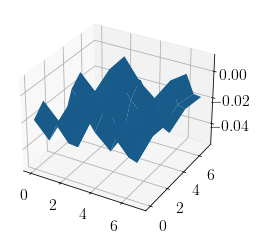

In [232]:
range_color=2
range_spin=4
sizes=[8,8,8,8]
folder="../notwist/fundamental/sector_0/"
folder_gf="../notwist/gf/"
zeromode=np.zeros((range_color, range_spin, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
eigenvalues=analyzer.Real_eigenvalue(folder+"Measure.seq","OverlapFilterModeC")
q_fund=0
for i in range(0,50):
    mode,density,sizes=Read.ascii_mode(folder+"OverlapMode2_"+str(i))
    density=Read.mode_to_density(mode,range_color,range_spin,sizes)
    lambda_i=eigenvalues["2"][i]
    q_fund+=-(lambda_i/2-1)*density

folder="../notwist/fundamental/sector_1/"
eigenvalues=analyzer.Real_eigenvalue(folder+"Measure.seq","OverlapFilterModeC")
for i in range(0,50):
    mode,density,sizes=Read.ascii_mode(folder+"OverlapMode2_"+str(i))
    density=Read.mode_to_density(mode,range_color,range_spin,sizes)
    lambda_i=eigenvalues["2"][i]
    q_fund+=(lambda_i/2-1)*density
    
#density=Read.mode_to_density(zeromode,range_color,range_spin,sizes)
maxima=Maxima.simple(-q_fund,sizes)
print(maxima)


#density_gf,sizes=Read.topology(folder_gf+"profile4dt0.2c2to.dat")
#maxima=Maxima.simple(-density_gf,sizes)
#print(maxima)

GM=Compare.Geom_mean(q_fund,density_gf)
print(GM)



density_2d=q_fund.sum(axis=(2,3))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
X = np.arange(0,sizes[2])
Y = np.arange(0,sizes[3])
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, density_2d)


[[4 4 4 4 4 4 4 4]
 [3 3 3 3 7 7 7 7]
 [1 1 5 5 1 1 5 5]
 [2 6 2 6 2 6 2 6]]


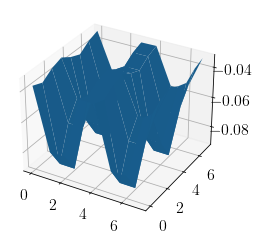

In [233]:
density_gf,sizes=Read.topology(folder_gf+"profile4dt0.2c2to.dat")
maxima=Maxima.simple(-density_gf,sizes)
print(maxima)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
X = np.arange(0,sizes[2])
Y = np.arange(0,sizes[3])
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, density_gf.sum(axis=(0,1)))

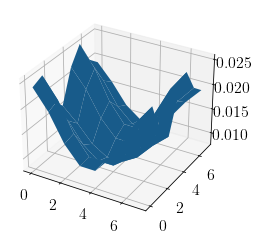

In [169]:
range_color=2
range_spin=4
sizes=[8,8,8,8]
folder="../notwist/fundamental/sector_1/"
for i in range(0,12):
    file=folder+"SusyMode_bin_"+str(i)+"-2"
    density,sizes=Read.bin_mode(file,sizes,range_color,range_spin)

    smode,sdensity,sizes=Read.ascii_mode(folder+"SusyMode_ascii_2_"+str(i))
    sdensity=Read.mode_to_density(smode,range_color,range_spin,sizes)
    maxima=Maxima.simple(sdensity,sizes)
    
    #print(density-sdensity)

density_2d=density.sum(axis=(1,3))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
X = np.arange(0,sizes[2])
Y = np.arange(0,sizes[3])
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, density_2d)

# Adjoint

[[3 3 3 3 4 4]
 [2 3 3 7 2 7]
 [4 3 4 1 5 2]
 [2 2 5 2 5 2]]
[[3 3 3 3 3 4]
 [1 2 4 4 7 4]
 [0 2 5 6 7 5]
 [1 6 2 1 1 6]]
[[4 4 4 4 4 4 4 4]
 [3 3 3 3 7 7 7 7]
 [1 1 5 5 1 1 5 5]
 [2 6 2 6 2 6 2 6]]
0.4700067206902618


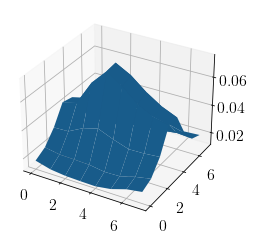

In [322]:
range_color=3
range_spin=4
sizes=[8,8,8,8]
folder="../notwist/adjoint/sector_0/"
folder="../heated/overlap/complex/"
folder_gf="../notwist/wilson/"

zeromode=np.zeros((range_color, range_spin, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
density=np.zeros((sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.double)
for i in range(0,16):
    mode,density,sizes=Read.ascii_mode(folder+"OverlapMode5_"+str(i))
    zeromode+=mode

    density_temp=Read.mode_to_density(mode,range_color,range_spin,sizes)
    density+=density_temp
    
density_susy=Read.mode_to_density(zeromode,range_color,range_spin,sizes)   

maxima=Maxima.simple(density,sizes)
print(maxima)

maxima=Maxima.simple(density_susy,sizes)
print(maxima)

density_gf,sizes=Read.topology(folder_gf+"profile4dt0c100to.dat")
maxima=Maxima.simple(-density_gf,sizes)
print(maxima)

GM=Compare.Geom_mean(density,-density_gf)
print(GM)

density_2d=density.sum(axis=(1,3))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
X = np.arange(0,sizes[2])
Y = np.arange(0,sizes[3])
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, density_2d)

[[4 4 4 4 4 4 4 4]
 [3 3 3 3 7 7 7 7]
 [1 1 5 5 1 1 5 5]
 [2 6 2 6 2 6 2 6]]
[[4 4 4 4 4 4 4 4]
 [3 3 3 3 7 7 7 7]
 [1 1 5 5 1 1 5 5]
 [2 6 2 6 2 6 2 6]]
[[4 4 4 4 4 4 4 4]
 [3 3 3 3 7 7 7 7]
 [1 1 5 5 1 1 5 5]
 [2 6 2 6 2 6 2 6]]
0.9824631301677487


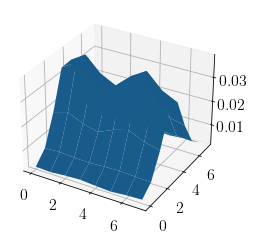

In [325]:
range_color=3
range_spin=4
sizes=[8,8,8,8]
folder_gf="../notwist/wilson/"
folder="../notwist/adjoint/sector_0/"
folder="../heated/overlap/real/"
file=folder+"SusyMode_bin_0-5"
density,sizes=Read.bin_mode(file,sizes,range_color,range_spin)
maxima_susy=Maxima.improve(density,sizes)
print(maxima_susy)

mode,density,sizes=Read.ascii_mode(folder+"SusyMode_ascii_5_0")
density_temp=Read.mode_to_density(mode,range_color,range_spin,sizes)
maxima_susy=Maxima.improve(density_temp,sizes)
print(maxima_susy)
    
density_gf,sizes=Read.topology(folder_gf+"profile4dt0c100to.dat")
maxima=Maxima.simple(-density_gf,sizes)
print(maxima)

GM=Compare.Geom_mean(density,-density_gf)
print(GM)

density_2d=density.sum(axis=(1,3))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
X = np.arange(0,sizes[2])
Y = np.arange(0,sizes[3])
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, density_2d)

[[14 15 16]
 [ 3  3  0]
 [ 2  0  5]
 [ 9 11 12]]


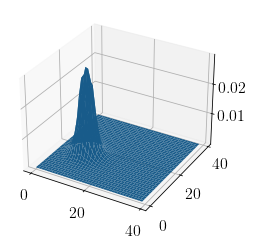

In [308]:
range_color=8
range_spin=4
sizes=[40,6,6,40]
folder_gf="../notwist/wilson/"
folder="/ssd/ivsol/filtering/40x6_su3/b0p4/afm/sector_0/"
file=folder+"SusyMode1-20"
density,sizes=Read.bin_mode(file,sizes,range_color,range_spin)
maxima_susy=Maxima.improve(density,sizes)
print(maxima_susy)
density_susy=density
density_2d=density.sum(axis=(1,2))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
X = np.arange(0,sizes[3])
Y = np.arange(0,sizes[0])
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, density_2d)

[[14 14 14 15 15 15 16 16]
 [ 0  3  5  2  2  3  0  3]
 [ 3  2  5  1  4  0  5  1]
 [27  9 29 31 30 11 12 30]]
0.9999995955400203


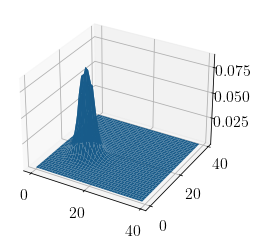

In [313]:
range_color=8
range_spin=4
sizes=[40,6,6,40]
folder_gf="../notwist/wilson/"
folder="/ssd/ivsol/filtering/40x6_su3/b0p4/complex/sector_0/"

zeromode=np.zeros((range_color, range_spin, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
density=np.zeros((sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.double)
for i in range(2,4):
    mode,density,sizes=Read.ascii_mode(folder+"OverlapMode20_"+str(i))
    zeromode+=mode

    density_temp=Read.mode_to_density(zeromode,range_color,range_spin,sizes)
    density+=density_temp
    
maxima=Maxima.improve(density,sizes)
print(maxima)

GM=Compare.Geom_mean(density,density_susy)
print(GM)


density_2d=density.sum(axis=(1,2))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
X = np.arange(0,sizes[3])
Y = np.arange(0,sizes[0])
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, density_2d)

In [314]:
range_color=8
range_spin=4
sizes=[40,6,6,40]
folder_gf="../notwist/wilson/"
folder="/ssd/ivsol/filtering/40x6_su3/b0p4/complex/sector_0/"

zeromode=np.zeros((range_color, range_spin, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
density=np.zeros((sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.double)

mode,density_1,sizes=Read.ascii_mode(folder+"OverlapMode20_"+str(2))
mode,density_2,sizes=Read.ascii_mode(folder+"OverlapMode20_"+str(3))

GM=Compare.Geom_mean(density_1,density_2)
print(GM)


1.0000000000000002
